In [15]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [16]:
class ClassicalOracle:

    def __init__(self, secret: np.array):
        self.n = len(secret)
        self.count = 0
        self.secret = secret

    def complexity(self) -> int:
        return self.n

    def number_of_queries(self) -> int:
        return self.count

    def query(self, inp: np.array) -> bool:
        self.count += 1
        product = np.dot(self.secret, inp)
        return product % 2


def classical_bv_algorithm(oracle: ClassicalOracle) -> np.array:
    n = oracle.complexity()
    secret = np.zeros(n, dtype=np.byte)

    for i in range(n):
        inp = np.zeros(n, dtype=np.byte)
        inp[i] = 1

        if oracle.query(inp):
            secret[i] = 1

    return secret

In [17]:
secret = list("010110")

secret_string = np.array(secret, dtype=np.byte)
oracle = ClassicalOracle(secret_string)

solution = classical_bv_algorithm(oracle)

print("secret string:".ljust(20, " "), secret_string)
print("classical solution:".ljust(20, " "), solution)
print("match:".ljust(20, " "), np.array_equal(solution, secret_string))
print("# of queries:".ljust(20, " "), oracle.number_of_queries())

secret string:       [0 1 0 1 1 0]
classical solution:  [0 1 0 1 1 0]
match:               True
# of queries:        6


In [39]:
class QuantumOracle:

    def __init__(self, secret: np.array):
        self.n = len(secret)
        self.count = 0
        self.secret = secret
        
    
    def circuit(self) -> QuantumCircuit:
        query_reg = QuantumRegister(self.n, "query")
        auxiliary_reg = QuantumRegister(1, "auxiliary")
        
        circuit = QuantumCircuit(query_reg, auxiliary_reg, name="oracle")
        
        for i in range(self.n):
            if self.secret[self.n - i - 1]:
                circuit.cx(query_reg[i], auxiliary_reg[0])
        
        return circuit

    def complexity(self) -> int:
        return self.n

    def number_of_queries(self) -> int:
        return self.count

    def query(self, inp: np.array) -> bool:
        self.count += 1
        product = np.dot(self.secret, inp)
        return product % 2

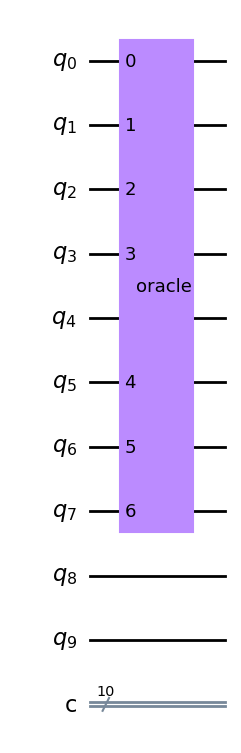

In [47]:
q_oracle = QuantumOracle(secret_string)
oracle = q_oracle.circuit()

qc = QuantumCircuit(10, 10)
qc.append(oracle, [0,1,2,3,5,6, 7])
qc.draw(output="mpl")